<b>Summary: </b> Finding air quality using regression model

<b>Dataset:</b> https://archive.ics.uci.edu/ml/datasets/Air+Quality
<b>Description: </b>

<b>Features: </b> <br>
0 Date	(DD/MM/YYYY)<br>
1 Time	(HH.MM.SS) <br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) <br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)<br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)<br>
7 True hourly averaged NOx concentration in ppb (reference analyzer)<br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)<br>
12 Temperature in Â°C<br>
13 Relative Humidity (%)<br>
14 AH Absolute Humidity<br>

<b>Target: </b><br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)<br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)<br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)<br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)<br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)<br>

<b>Note: 3 errors in dataset</b> <br>
Missing elements have -200 value (in two datatypes integer and string)<br>
It is semi-colon seperated data not coma separated data<br>
Floating point values coma rather than pointer

In [2]:
import pandas as pd

In [3]:
air_data =  pd.read_csv("datasets/AirQualityUCI/AirQualityUCI.csv",sep=';', engine='python')

In [4]:
air_data.head(15)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010,19,"1,7",561,-200,1705,-200,1235,501,"10,3","60,2","0,7517",NaN,NaN


#### Removing unwanted columns

We will consider value of ozone layer only <br>
therefore we will consider PT08.S5(O3)

In [5]:
unwanted_cols= ['Date','Time','PT08.S1(CO)','PT08.S2(NMHC)',\
                'PT08.S3(NOx)','PT08.S4(NO2)','Unnamed: 15', 'Unnamed: 16']

In [6]:
air_data = air_data.drop(unwanted_cols, axis=1)

In [7]:
air_data.columns

Index(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

#### Cleaning Datset

In [8]:
len(air_data)

9357

Removing all rows having -200 as data in any comlum<br>
(empty cells have -200 value in it)

In [9]:
~air_data.eq('-200').head(15)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True


Some elements have '-200' in string datatype and some in integer datatype<br>
So we need to drop both the elements

In [10]:
air_data = air_data[~air_data.eq(-200)]

In [11]:
air_data = air_data[~air_data.eq('-200')]

In [12]:
air_data.head(15)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,"2,6",150.0,"11,9",166.0,113.0,1268.0,"13,6","48,9","0,7578"
1,2,112.0,"9,4",103.0,92.0,972.0,"13,3","47,7","0,7255"
2,"2,2",88.0,"9,0",131.0,114.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",80.0,"9,2",172.0,122.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",51.0,"6,5",131.0,116.0,1110.0,"11,2","59,6","0,7888"
5,"1,2",38.0,"4,7",89.0,96.0,949.0,"11,2","59,2","0,7848"
6,"1,2",31.0,"3,6",62.0,77.0,733.0,"11,3","56,8","0,7603"
7,1,31.0,"3,3",62.0,76.0,730.0,"10,7","60,0","0,7702"
8,"0,9",24.0,"2,3",45.0,60.0,620.0,"10,7","59,7","0,7648"
9,"0,6",19.0,"1,7",NaN,NaN,501.0,"10,3","60,2","0,7517"


In [13]:
air_data = air_data.dropna()

In [14]:
len(air_data)

827

Converting in numbers and replacing comas with string

In [15]:
air_data = air_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.')))
air_data.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,1268.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,972.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,1074.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,1203.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,1110.0,11.2,59.6,0.7888


In [16]:
air_data.dtypes

CO(GT)         float64
NMHC(GT)       float64
C6H6(GT)       float64
NOx(GT)        float64
NO2(GT)        float64
PT08.S5(O3)    float64
T              float64
RH             float64
AH             float64
dtype: object

#### Collecting Features

In [17]:
features = ['CO(GT)','NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)','T', 'RH','AH']
air_features = air_data[features]

In [18]:
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


#### Collecting Target

In [19]:
air_target = air_data[['PT08.S5(O3)']]

In [20]:
air_target.head()

,PT08.S5(O3)
0,1268.0
1,972.0
2,1074.0
3,1203.0
4,1110.0


#### Scaling 

In [21]:
from sklearn import preprocessing

In [22]:
scalable_cols = air_features.columns

The SettingWithCopyWarning was created to flag potentially confusing "chained" assignments, but it flags some correct assignements too<br>
Hence to curb that warning we will disable chained assignment warning 

doc: http://pandas-docs.github.io/pandas-docs-travis/indexing.html#why-does-assignment-fail-when-using-chained-indexing

In [23]:
pd.options.mode.chained_assignment = None

In [24]:
air_features[scalable_cols] = preprocessing.scale(air_features[scalable_cols])

In [25]:
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,0.174943,-0.388917,0.152273,0.275105,0.404769,-0.415033,-0.009843,-0.415098
1,-0.250998,-0.571315,-0.184943,-0.495252,-0.262432,-0.477243,-0.088493,-0.596154
2,-0.109018,-0.686514,-0.238897,-0.152871,0.436541,-0.767556,0.324418,-0.457699
3,-0.109018,-0.724913,-0.211920,0.348473,0.690713,-0.954186,0.717667,-0.253100
4,-0.534959,-0.864111,-0.576113,-0.152871,0.500084,-0.912712,0.691451,-0.241329


#### Create training and test data using train_test_split

In [28]:
from sklearn.model_selection import train_test_split

#### Split the data into two chunks - 95% for training and 5% for testing 
We can then check the accuracy of our model on the test data


In [29]:
X_train, x_test, Y_train, y_test = train_test_split(air_features,
                                                    air_target,
                                                    test_size=0.05,
                                                    random_state=0)

#### Converting data in pytorch tensors

In [30]:
import torch

In [31]:
dtype = torch.float

In [32]:
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [33]:
X_train_tensor.shape

torch.Size([785, 8])

In [34]:
Y_train_tensor.shape

torch.Size([785, 1])

#### Define the parameters for the neural network
* <b>inp</b> sets the input size to 26 to match the shape of the X_train_tensor. With the one-hot-encoding, we have multiple columns in our X data
* <b>out</b> will be used to set the size of the output from the neural network. We only predict a single ozone layer value, so this will be 1
* <b>hid</b> is used to set the number of hidden layers in our neural network
* <b>loss_fn</b> is MSELoss since we're performing a linear regression
* <b>learning_rate</b> is set to 0.0001

In [35]:
inp = 8
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

<b>nn.Sequential:</b>
Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

<b>nn.Linear: </b> Applies a linear transformation to the incoming data: y=Ax+b<br>
parameters:<br>
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

#### Creating model using nn.Sequantial(..)

In [36]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out),
)

#### Training our model

Foward Pass:
* Predicting Y with input data X

Finding Loss:
* Finding difference between Y_train_tensor and Y_pred using MSEloss function defined above


Back Propogation:
* starting with zero gradients before back propogation
* back propogation is done by simply loss.backward() function

Manually updating model parameters
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* model.parameter() returns all the weights and biases of parameters
* reducing weight with multiple of learning rate and gradient

In [37]:
for iter in range(1, 100001):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)

    if iter % 10000 ==0:
        print(iter, int(loss.item()))
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

10000 8224
20000 6849
30000 6125
40000 5629
50000 5254
60000 4986
70000 4768
80000 4588
90000 4431
100000 4283


#### Using our model for predictions
We pick one of the rows from the test data set for predictions

In [38]:
sample = x_test.iloc[23]
sample

CO(GT)     -0.250998
NMHC(GT)   -0.206519
C6H6(GT)   -0.117500
NOx(GT)    -0.201782
NO2(GT)     0.404769
T           0.041172
RH         -0.068830
AH          0.140402
Name: 532, dtype: float64

#### We convert these features to a Pytorch tensor

In [39]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = dtype)
sample_tensor

tensor([-0.2510, -0.2065, -0.1175, -0.2018,  0.4048,  0.0412, -0.0688,
         0.1404])

#### Compare the actual and predicted values for this air quality features
The predicted quality is very close to its actual quality

In [40]:
y_pred = model(sample_tensor)
print("Predicted air quality is : ", int(y_pred.item()))
print("Actual actual air quality is : ", int(y_test.iloc[23]))

Predicted air quality is :  1091
Actual actual air quality is :  1200


#### Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [41]:
y_pred_tensor = model(x_test_tensor)

#### The tensor is converted to a numpy array

In [42]:
y_pred = y_pred_tensor.detach().numpy()

#### Plot a graph of the predicted values against the actual ones 
The good news is there appears to be a strong positive correlation 

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.title("Predicted value vs Actual value")
plt.show()

<Figure size 640x480 with 1 Axes>

#### Saving our trained model
Pytorch allows our model to be saved. The parameters to the torch.save() method are the model to be saved followed by the directory path where it should be saved

In [44]:
torch.save(model, 'my_model')

#### Loading  an already saved model
We can load a saved model using the torch.load() method

In [45]:
saved_model = torch.load('my_model')

#### We now use the saved model to perform predictions
It is now used exactly how we used the model before it was saved

In [46]:
y_pred_tensor = saved_model(x_test_tensor)

In [47]:
y_pred = y_pred_tensor.detach().numpy()

#### This time we perform a closer comparison of the actual and predicted values
We do this by plotting separate lines for the actual and predicted values

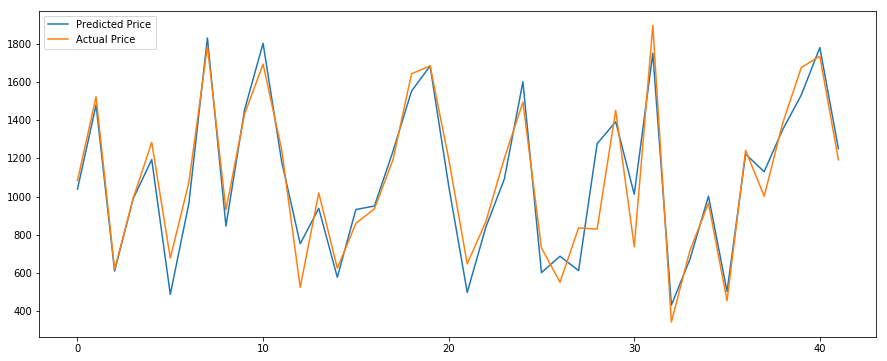

In [48]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted value')
plt.plot(y_test.values, label='Actual value')

plt.legend()
plt.show()